# [CBB750_Final Project] Analysis of Tweets related to Mental Health Services
### Author: Yining Chen, Siyan Guo, Ziqing Ji

# Scraping Twitter Data


In [ ]:
#https://betterprogramming.pub/step-by-step-guide-to-creating-a-twitter-developer-account-and-scraping-data-using-python-r-or-128e6f4287a


In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Twitter data scrapping including timeframe

import pandas as pd
import snscrape.modules.twitter as sntwitter
import tqdm

maxTweets = 30

# Creating list to append tweet data to
tweets_list = []

keywords = ["mental health services", "mental health provider", "mental health facility", "mental health professional",
            "mental health assistance", "mental health apps"," mental health support","mental health resources",
            "mental health professionals","mental health psychiatrist"]

# Specify the start and end dates for the search
start_date = ["2017-01-01", "2017-04-01", "2017-07-01", "2017-10-01","2018-01-01", "2018-04-01", "2018-07-01", "2018-10-01",
              "2019-01-01", "2019-04-01", "2019-07-01", "2019-10-01","2020-01-01", "2020-04-01", "2020-07-01", "2020-10-01",
              "2021-01-01", "2021-04-01", "2021-07-01", "2021-10-01","2022-01-01", "2022-04-01", "2022-07-01", "2022-10-01"]
end_date =   ["2017-03-31", "2017-06-30", "2017-09-30", "2017-12-31","2018-03-31", "2018-06-30", "2018-09-30", "2018-12-31",
              "2019-03-31", "2019-06-30", "2019-09-30", "2019-12-31","2020-03-31", "2020-06-30", "2020-09-30", "2020-12-31",
              "2021-03-31", "2021-06-30", "2021-09-30", "2021-12-31","2022-03-31", "2022-06-30", "2022-09-30", "2022-12-31"]

# Using TwitterSearchScraper to scrape data within the specified date range
for keyword in tqdm.tqdm(keywords):
  for i in range(len(start_date)):
      query = f'{keyword} since:{start_date[i]} until:{end_date[i]}'
      for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
          if i > maxTweets:
              break
          tweets_list.append([tweet.content, tweet.date])

tweets_df = pd.DataFrame(tweets_list, columns=['Text', 'Datetime'])



  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-83-61de67bc06e3>:31: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.content, tweet.date])
100%|██████████| 10/10 [08:51<00:00, 53.11s/it]


In [ ]:
tweets_df['datetime'] = pd.to_datetime(tweets_df['Datetime'])
tweets_df = tweets_df.sort_values('datetime')
sorted_data = tweets_df.reset_index(drop=True)
sorted_data = tweets_df.drop(columns=['Datetime'])
sorted_data.to_csv("tweets_data_sorted.csv")

In [ ]:
pre_covid = sorted_data[sorted_data['datetime'] <= '2020-01-01 00:00:00']
post_covid = sorted_data[sorted_data['datetime'] > '2020-01-01 00:00:00']
post_covid.to_csv("postcovid.csv")
pre_covid.to_csv("precovid.csv")
print(len(pre_covid))
print(len(post_covid))


3720
3720


# Sentiment Analysis (with Vader)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


tweets_data_sorted.csv
   Unnamed: 0                                               Text  \
0        3006  Mental Health coverage, maternity care, substa...   
1        3005  Great article about assistance #animals \n#dis...   
2        3004  @elbh 1/2 I think our states should be able to...   
3        3003  .@SpeakerRyan @realDonaldTrump If you're exper...   
4        3002  Help for military families includes access to ...   

              datetime sentiment  
0  2017-03-24 16:14:17  positive  
1  2017-03-24 17:11:17  positive  
2  2017-03-24 18:01:02   neutral  
3  2017-03-24 19:50:49  negative  
4  2017-03-24 20:05:08  positive  
positive    3990
negative    2115
neutral     1335
Name: sentiment, dtype: int64


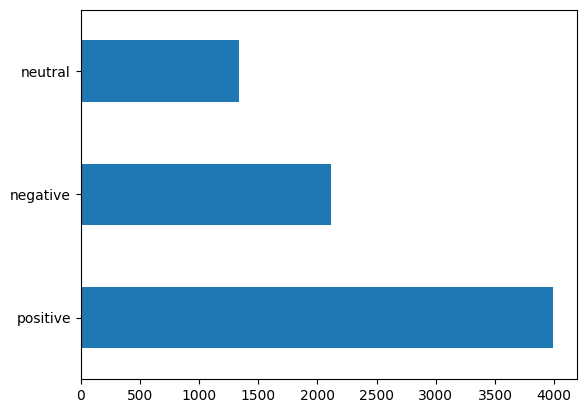

precovid.csv
   Unnamed: 0                                               Text  \
0        3006  Mental Health coverage, maternity care, substa...   
1        3005  Great article about assistance #animals \n#dis...   
2        3004  @elbh 1/2 I think our states should be able to...   
3        3003  .@SpeakerRyan @realDonaldTrump If you're exper...   
4        3002  Help for military families includes access to ...   

              datetime sentiment  
0  2017-03-24 16:14:17  positive  
1  2017-03-24 17:11:17  positive  
2  2017-03-24 18:01:02   neutral  
3  2017-03-24 19:50:49  negative  
4  2017-03-24 20:05:08  positive  
positive    1889
negative    1077
neutral      754
Name: sentiment, dtype: int64


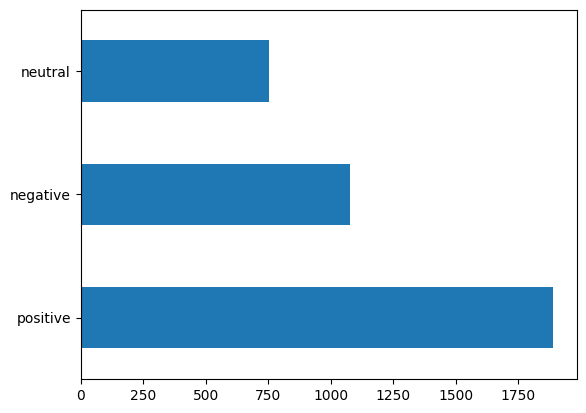

postcovid.csv
   Unnamed: 0                                               Text  \
0        1146  @JeffreeStar could you please say happy birthd...   
1        1145  During the COVID-19 pandemic, healthcare profe...   
2        1144  I absolutely hate seeing people suffer. I feel...   
3        1143  @realDonaldTrump "If you recognize aspects of ...   
4        1142  Mental Health check-in, hows everyone doing? F...   

              datetime sentiment  
0  2020-03-29 14:32:57  positive  
1  2020-03-29 18:54:17   neutral  
2  2020-03-29 20:20:34  negative  
3  2020-03-29 20:22:54  positive  
4  2020-03-29 20:58:32  positive  
positive    2101
negative    1038
neutral      581
Name: sentiment, dtype: int64


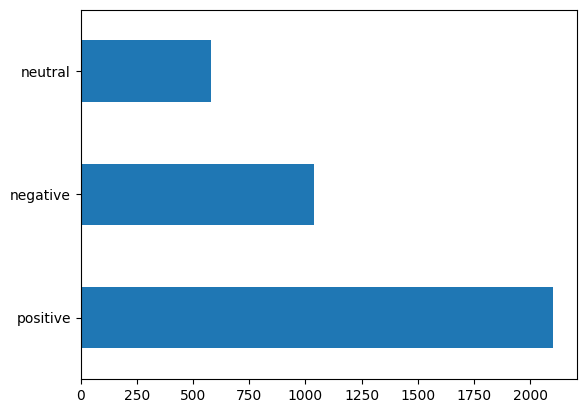

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment
def sentiment_classify(text):
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score > 0.1:
        return 'positive'
    elif compound_score < -0.1:
        return 'negative'
    else:
        return 'neutral'


file_path = ['tweets_data_sorted.csv', "precovid.csv","postcovid.csv"]  # Replace with your CSV file path
for f in file_path:
  print(f)
  data = pd.read_csv(f)
  # Apply sentiment classification to the 'text' column
  data['sentiment'] = data['Text'].apply(sentiment_classify)

  # Save the results to a new CSV file
  data.to_csv(f'sentiment_analysis_results{f}.csv', index=False)

  # Print the first few rows to see the sentiment analysis results
  print(data.head())

  # Print the sentiment counts
  print(data['sentiment'].value_counts())
  data['sentiment'].value_counts().plot(kind='barh')
  plt.show()


In [ ]:
all = pd.read_csv("sa_all.csv")
all_pos = all[all["sentiment"] == "positive"]
all_pos.to_csv("pos_sa_all.csv")
all_neg = all[all["sentiment"] == "negative"]
all_neg.to_csv("neg_sa_all.csv")
all_neu = all[all["sentiment"] == "neutral"]
all_neu.to_csv("neu_sa_all.csv")

# Sentiment Analysis (TextBlob)

tweets_data_sorted.csv
   Unnamed: 0                                               Text  \
0        3006  Mental Health coverage, maternity care, substa...   
1        3005  Great article about assistance #animals \n#dis...   
2        3004  @elbh 1/2 I think our states should be able to...   
3        3003  .@SpeakerRyan @realDonaldTrump If you're exper...   
4        3002  Help for military families includes access to ...   

              datetime sentiment  
0  2017-03-24 16:14:17  negative  
1  2017-03-24 17:11:17  positive  
2  2017-03-24 18:01:02  positive  
3  2017-03-24 19:50:49  negative  
4  2017-03-24 20:05:08   neutral  
positive    3099
negative    2406
neutral     1935
Name: sentiment, dtype: int64


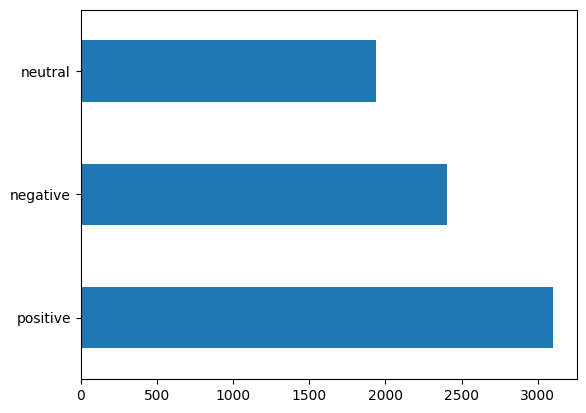

precovid.csv
   Unnamed: 0                                               Text  \
0        3006  Mental Health coverage, maternity care, substa...   
1        3005  Great article about assistance #animals \n#dis...   
2        3004  @elbh 1/2 I think our states should be able to...   
3        3003  .@SpeakerRyan @realDonaldTrump If you're exper...   
4        3002  Help for military families includes access to ...   

              datetime sentiment  
0  2017-03-24 16:14:17  negative  
1  2017-03-24 17:11:17  positive  
2  2017-03-24 18:01:02  positive  
3  2017-03-24 19:50:49  negative  
4  2017-03-24 20:05:08   neutral  
positive    1491
negative    1238
neutral      991
Name: sentiment, dtype: int64


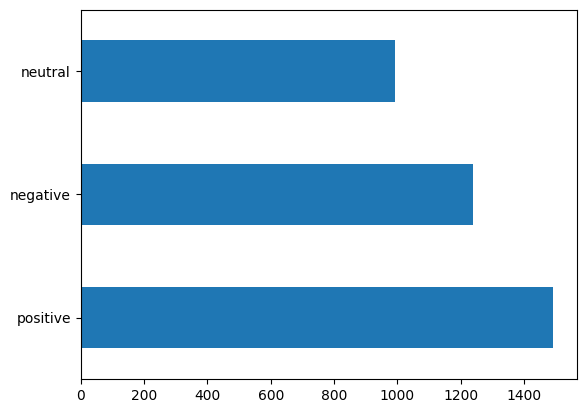

postcovid.csv
   Unnamed: 0                                               Text  \
0        1146  @JeffreeStar could you please say happy birthd...   
1        1145  During the COVID-19 pandemic, healthcare profe...   
2        1144  I absolutely hate seeing people suffer. I feel...   
3        1143  @realDonaldTrump "If you recognize aspects of ...   
4        1142  Mental Health check-in, hows everyone doing? F...   

              datetime sentiment  
0  2020-03-29 14:32:57  positive  
1  2020-03-29 18:54:17  negative  
2  2020-03-29 20:20:34  negative  
3  2020-03-29 20:22:54  positive  
4  2020-03-29 20:58:32  positive  
positive    1608
negative    1168
neutral      944
Name: sentiment, dtype: int64


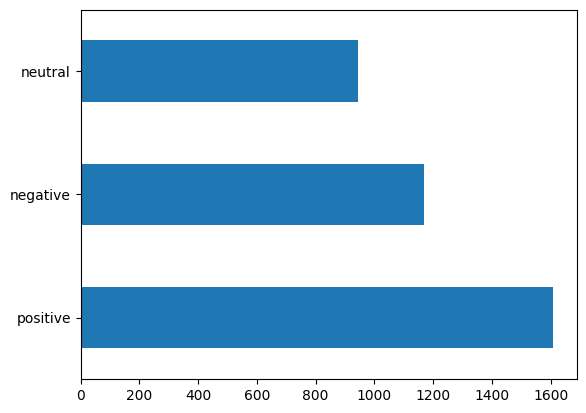

In [ ]:
from textblob import TextBlob

# Function to classify sentiment
def sentiment_classify(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.05:
        return 'positive'
    elif polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'


file_path = ['tweets_data_sorted.csv', "precovid.csv","postcovid.csv"]  # Replace with your CSV file path
for f in file_path:
  print(f)
  data = pd.read_csv(f)
  # Apply sentiment classification to the 'text' column
  data['sentiment'] = data['Text'].apply(sentiment_classify)

  # Save the results to a new CSV file
  data.to_csv(f'sentiment_analysis_results{f}.csv', index=False)

  # Print the first few rows to see the sentiment analysis results
  print(data.head())

  # Print the sentiment counts
  print(data['sentiment'].value_counts())
  data['sentiment'].value_counts().plot(kind='barh')
  plt.show()


# Temporal Analysis

In [ ]:
data = pd.read_csv("tweets_data_sorted.csv")

# Function to classify sentiment (VADER)
def vader(text):
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score > 0.1:
        return 'positive'
    elif compound_score < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Function to classify sentiment (TEXTBLOB)
def text_blob(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.05:
        return 'positive'
    elif polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'


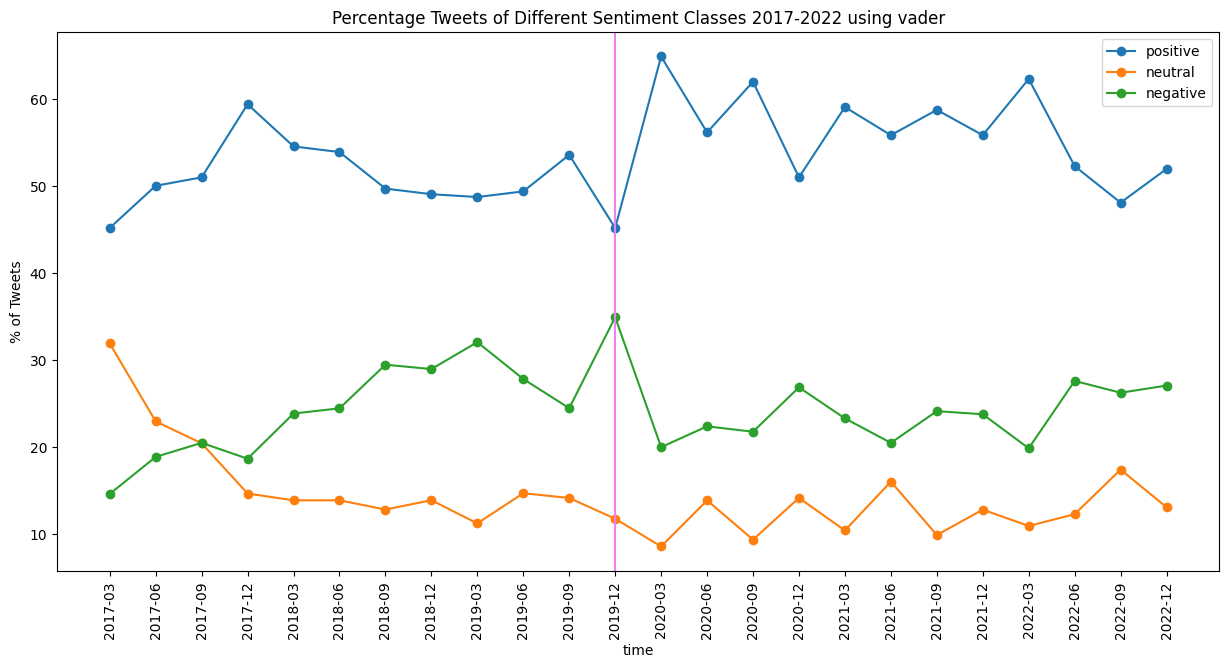

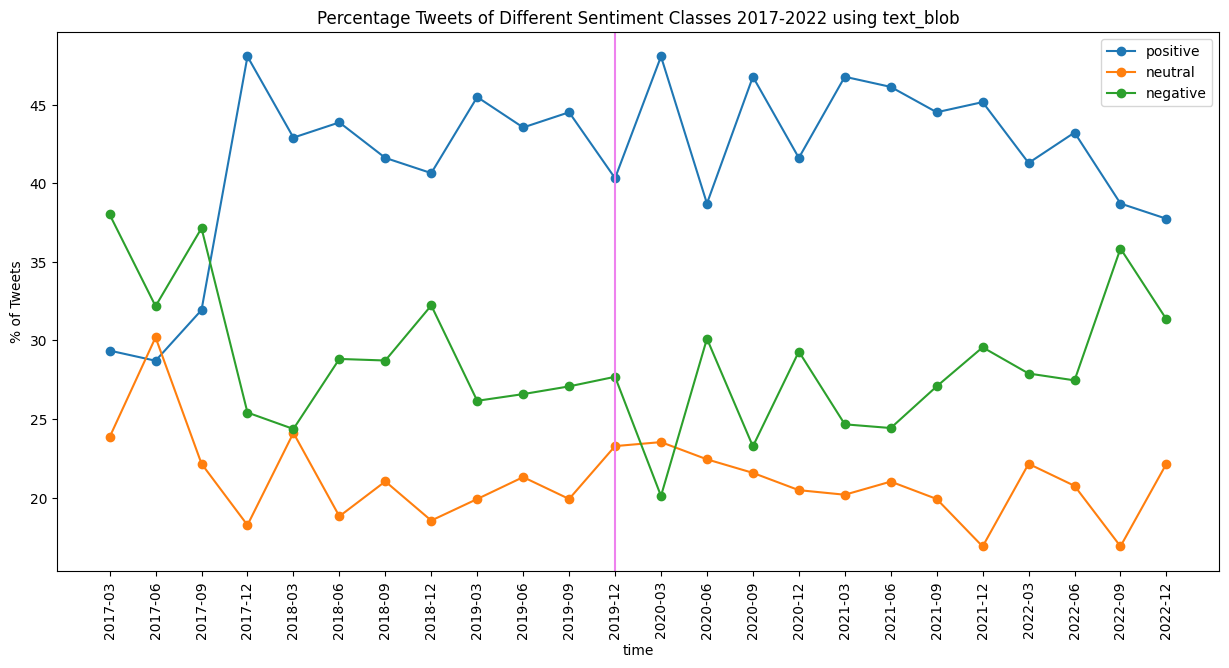

In [ ]:
from matplotlib import pyplot as plt
def over_time(data, sentiment_analysis_method):
  #apply sentiment analysis
  data['sentiment'] = data['Text'].apply(sentiment_analysis_method)

  #get needed columns
  data = data[["Text", "datetime", "sentiment"]]

  #transform datetime column to datetime
  data['datetime'] = pd.to_datetime(data['datetime'])

  # group by year
  data['time'] = data['datetime'].dt.strftime('%Y-%m')
  grouped = data.groupby(['time', 'sentiment']).size().reset_index(name='count')

  #calculate positive percentages
  pivoted = grouped.pivot(index='time', columns='sentiment', values='count')
  pivoted['percent_positive'] = (pivoted['positive'] / pivoted.sum(axis=1)) * 100
  pivoted['percent_negative'] = (pivoted['negative'] / pivoted.sum(axis=1)) * 100
  pivoted['percent_neutral'] = (pivoted['neutral'] / pivoted.sum(axis=1)) * 100


  #plotting
  plt.figure(figsize = (15,7))
  plt.plot(pivoted['percent_positive'], marker='o', label ="positive")
  plt.plot(pivoted['percent_neutral'], marker='o', label ="neutral")
  plt.plot(pivoted['percent_negative'], marker='o', label ="negative")
  plt.xlabel('time')
  plt.ylabel('% of Tweets')
  plt.xticks(rotation=90)
  plt.axvline(x = "2019-12", color = 'violet')
  plt.title('Percentage Tweets of Different Sentiment Classes 2017-2022 using ' + sentiment_analysis_method.__name__)
  plt.legend()
  plt.show()


over_time(data, vader)
over_time(data, text_blob)

# Topic Modeling (BERT, PCA: and k Means)
## This is our draft, we did not choose (BERT, PCA, and K Means) model at last

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 1.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans




   Unnamed: 0                                               Text  \
0        3006  Mental Health coverage, maternity care, substa...   
1        3005  Great article about assistance #animals \n#dis...   
2        3004  @elbh 1/2 I think our states should be able to...   
3        3003  .@SpeakerRyan @realDonaldTrump If you're exper...   
4        3002  Help for military families includes access to ...   

              datetime  
0  2017-03-24 16:14:17  
1  2017-03-24 17:11:17  
2  2017-03-24 18:01:02  
3  2017-03-24 19:50:49  
4  2017-03-24 20:05:08  


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

file_path = 'neg_sa_all.csv'
data = pd.read_csv(file_path)


print(data.head())

# Set the BERT model
model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Function to encode tweets using BERT
def encode(tweet):
    inputs = tokenizer(tweet, return_tensors='pt', padding=True, truncation=True, max_length=128)
    outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].detach().numpy().reshape(1, -1)

# Encode the tweets and convert to a 2D array
embeddings_array = np.vstack([encode(tweet) for tweet in data['Text']])

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_array)

# Perform clustering using K-means
num_clusters = 5  # Change the number of clusters as desired
kmeans = KMeans(n_clusters=num_clusters)
data['cluster'] = kmeans.fit_predict(reduced_embeddings)

# # Print the tweets in each cluster
# for cluster in range(num_clusters):
#     print(f"\nCluster {cluster + 1}:")
#     for tweet in data[data['cluster'] == cluster]['Text'].head(10):
#         print(f"- {tweet}")



   Unnamed: 0.1  Unnamed: 0  \
0             3        3003   
1             7        2999   
2             9        2997   
3            18         770   
4            21         769   

                                                Text             datetime  \
0  .@SpeakerRyan @realDonaldTrump If you're exper...  2017-03-24 19:50:49   
1  @MMFlint it's crazy that they're so hell bent ...  2017-03-24 21:52:51   
2  again to profit off their pain and get what st...  2017-03-25 09:00:30   
3  @Always_Spooning \nMH = mental health \nMI = m...  2017-03-27 15:40:55   
4  New #mentalhealth provider stopping my #ADD &a...  2017-03-27 18:27:06   

  sentiment  
0  negative  
1  negative  
2  negative  
3  negative  
4  negative  


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
!pip install umap-learn
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=3b0cdb1f4bbbf0fa8fbca55c81db82d0c342e8c9cfaf51037db62f990a7cb27d
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.9-py3-none-any.whl size=55620 sha256=dd6f48d3fc48ee87ca247ddd3bc7c6f5057c3d488344654a78394c719f09a638
  Stored in directory: /root/.cache/pip/wheels/eb/f2/e3/b8e73d1488d8284d88c9283411561b65bd4f0200abf131a946
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/pu

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
import umap.umap_ as umap
import matplotlib.pyplot as plt



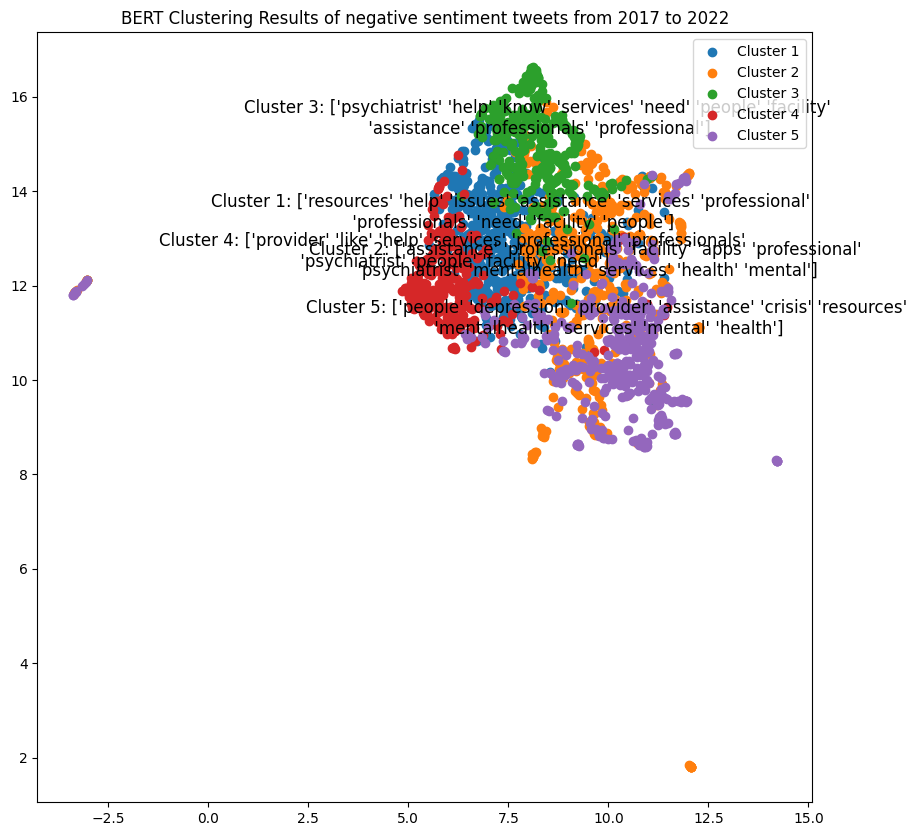

In [ ]:
# Function to extract keywords for each cluster
def extract_keywords(cluster):
    texts = data[data['cluster'] == cluster]['Text'].values

    # Default English stop words
    default_stop_words = set(CountVectorizer(stop_words='english').get_stop_words())

    # Custom stop words
    custom_stop_words = {'amp', 'https', 'http'}

    # Combine default and custom stop words
    all_stop_words = default_stop_words.union(custom_stop_words)

    # Use combined stop words in the vectorizer
    vectorizer = CountVectorizer(stop_words=list(all_stop_words), max_df=0.9, min_df=2)
    X = vectorizer.fit_transform(texts)
    keywords = [vectorizer.get_feature_names_out()[i] for i in X.sum(axis=0).argsort()[0, -10:].tolist()[::-1]]
    return keywords

# Extract keywords for each cluster
keywords_per_cluster = {}
for cluster in range(num_clusters):
    keywords = extract_keywords(cluster)
    keywords_per_cluster[cluster] = keywords

# Reduce dimensions using UMAP
umap_model = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
reduced_embeddings = umap_model.fit_transform(embeddings_array)

# Plot the clustering results
plt.figure(figsize=(10, 10))
for cluster in range(num_clusters):
    cluster_points = reduced_embeddings[data['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster + 1}')

    plt.annotate(f'Cluster {cluster + 1}: {", ".join([str(keyword) for keyword in keywords_per_cluster[cluster]])}',
                 (cluster_points[:, 0].mean(), cluster_points[:, 1].mean()),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12)


plt.title('BERT Clustering Results of negative sentiment tweets from 2017 to 2022')
plt.legend()
plt.show()

In [ ]:
for keywords in keywords_per_cluster.values():
  print(keywords)

[array(['resources', 'help', 'issues', 'assistance', 'services',
       'professional', 'professionals', 'need', 'facility', 'people'],
      dtype=object)]
[array(['assistance', 'professionals', 'facility', 'apps', 'professional',
       'psychiatrist', 'mentalhealth', 'services', 'health', 'mental'],
      dtype=object)]
[array(['psychiatrist', 'help', 'know', 'services', 'need', 'people',
       'facility', 'assistance', 'professionals', 'professional'],
      dtype=object)]
[array(['provider', 'like', 'help', 'services', 'professional',
       'professionals', 'psychiatrist', 'people', 'facility', 'need'],
      dtype=object)]
[array(['people', 'depression', 'provider', 'assistance', 'crisis',
       'resources', 'mentalhealth', 'services', 'mental', 'health'],
      dtype=object)]


   Unnamed: 0.1  Unnamed: 0  \
0             0        3006   
1             1        3005   
2             4        3002   
3             6        3000   
4             8        2998   

                                                Text             datetime  \
0  Mental Health coverage, maternity care, substa...  2017-03-24 16:14:17   
1  Great article about assistance #animals \n#dis...  2017-03-24 17:11:17   
2  Help for military families includes access to ...  2017-03-24 20:05:08   
3  "Donald Trump praises Democrats for ensuring a...  2017-03-24 20:56:44   
4  Hey ya know I worked in mental health for 30+ ...  2017-03-25 01:38:25   

  sentiment  
0  positive  
1  positive  
2  positive  
3  positive  
4  positive  


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


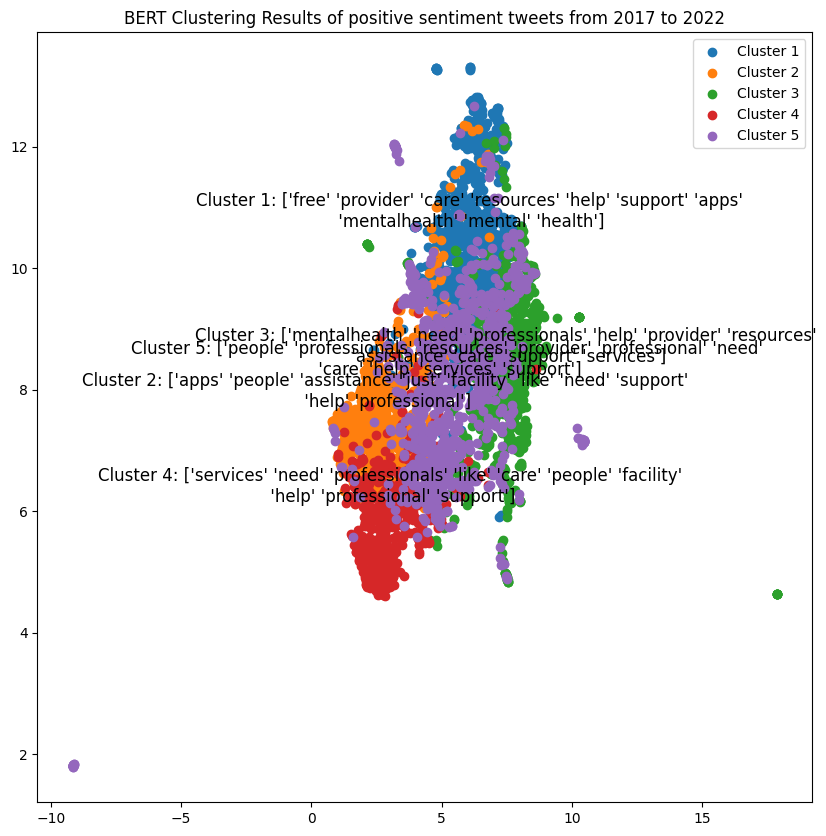

[array(['free', 'provider', 'care', 'resources', 'help', 'support', 'apps',
       'mentalhealth', 'mental', 'health'], dtype=object)]
[array(['apps', 'people', 'assistance', 'just', 'facility', 'like', 'need',
       'support', 'help', 'professional'], dtype=object)]
[array(['mentalhealth', 'need', 'professionals', 'help', 'provider',
       'resources', 'assistance', 'care', 'support', 'services'],
      dtype=object)]
[array(['services', 'need', 'professionals', 'like', 'care', 'people',
       'facility', 'help', 'professional', 'support'], dtype=object)]
[array(['people', 'professionals', 'resources', 'provider', 'professional',
       'need', 'care', 'help', 'services', 'support'], dtype=object)]


In [ ]:

file_path = 'pos_sa_all.csv'
data = pd.read_csv(file_path)

# Check the data and make sure the 'text' column contains the tweets
print(data.head())

# Set the BERT model
model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Function to encode tweets using BERT
def encode(tweet):
    inputs = tokenizer(tweet, return_tensors='pt', padding=True, truncation=True, max_length=128)
    outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].detach().numpy().reshape(1, -1)

# Encode the tweets and convert to a 2D array
embeddings_array = np.vstack([encode(tweet) for tweet in data['Text']])

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_array)

# Perform clustering using K-means
num_clusters = 5  # Change the number of clusters as desired
kmeans = KMeans(n_clusters=num_clusters)
data['cluster'] = kmeans.fit_predict(reduced_embeddings)

# # Print the tweets in each cluster
# for cluster in range(num_clusters):
#     print(f"\nCluster {cluster + 1}:")
#     for tweet in data[data['cluster'] == cluster]['Text'].head(10):
#         print(f"- {tweet}")

# Function to extract keywords for each cluster
def extract_keywords(cluster):
    texts = data[data['cluster'] == cluster]['Text'].values

    # Default English stop words
    default_stop_words = set(CountVectorizer(stop_words='english').get_stop_words())

    # Custom stop words
    custom_stop_words = {'amp', 'https', 'http'}

    # Combine default and custom stop words
    all_stop_words = default_stop_words.union(custom_stop_words)

    # Use combined stop words in the vectorizer
    vectorizer = CountVectorizer(stop_words=list(all_stop_words), max_df=0.9, min_df=2)
    X = vectorizer.fit_transform(texts)
    keywords = [vectorizer.get_feature_names_out()[i] for i in X.sum(axis=0).argsort()[0, -10:].tolist()[::-1]]
    return keywords

# Extract keywords for each cluster
keywords_per_cluster = {}
for cluster in range(num_clusters):
    keywords = extract_keywords(cluster)
    keywords_per_cluster[cluster] = keywords

# Reduce dimensions using UMAP
umap_model = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
reduced_embeddings = umap_model.fit_transform(embeddings_array)

# Plot the clustering results
plt.figure(figsize=(10, 10))
for cluster in range(num_clusters):
    cluster_points = reduced_embeddings[data['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster + 1}')

    plt.annotate(f'Cluster {cluster + 1}: {", ".join([str(keyword) for keyword in keywords_per_cluster[cluster]])}',
                 (cluster_points[:, 0].mean(), cluster_points[:, 1].mean()),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12)


plt.title('BERT Clustering Results of positive sentiment tweets from 2017 to 2022')
plt.legend()
plt.show()

for keywords in keywords_per_cluster.values():
  print(keywords)

# Topic Modeling (LDA)
## This is our draft, we did not choose LDA model at last


In [ ]:
import nltk
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   Unnamed: 0                                               Text  \
0        3006  Mental Health coverage, maternity care, substa...   
1        3005  Great article about assistance #animals \n#dis...   
2        3004  @elbh 1/2 I think our states should be able to...   
3        3003  .@SpeakerRyan @realDonaldTrump If you're exper...   
4        3002  Help for military families includes access to ...   

              datetime  
0  2017-03-24 16:14:17  
1  2017-03-24 17:11:17  
2  2017-03-24 18:01:02  
3  2017-03-24 19:50:49  
4  2017-03-24 20:05:08  


(0, '0.063*"." + 0.053*"mental" + 0.051*"health" + 0.046*"," + 0.039*"@" + 0.020*":" + 0.013*"’" + 0.012*"services" + 0.008*"\'s" + 0.008*";"')
(1, '0.095*"#" + 0.058*"," + 0.046*":" + 0.030*"@" + 0.029*"." + 0.028*"health" + 0.024*"mental" + 0.019*"mentalhealth" + 0.010*"?" + 0.010*"!"')
(2, '0.108*"#" + 0.068*"@" + 0.036*":" + 0.035*"." + 0.034*"health" + 0.033*"mental" + 0.024*"," + 0.014*"mentalhealth" + 0.012*"!" + 0.009*"professionals"')
(3, '0.030*"mental" + 0.029*"health" + 0.028*"!" + 0.021*":" + 0.012*"-" + 0.011*"@" + 0.011*"provider" + 0.008*";" + 0.007*"&" + 0.006*"event"')
(4, '0.073*"." + 0.053*"health" + 0.051*"mental" + 0.042*":" + 0.030*"," + 0.028*"@" + 0.017*"’" + 0.011*"#" + 0.011*"help" + 0.010*"support"')


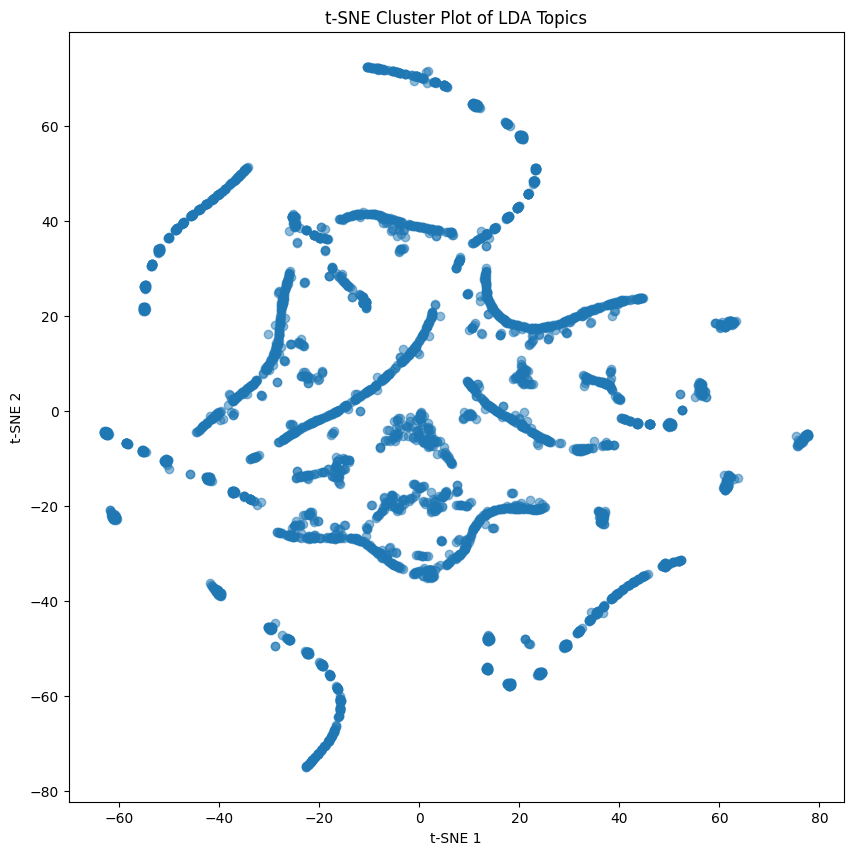

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

file_path = 'precovid.csv'
data = pd.read_csv(file_path)


custom_stop_words = {'https', 'http', 'amp'}
all_stop_words = set(stopwords.words('english')).union(custom_stop_words)
data['tokens'] = data['Text'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word not in all_stop_words])

# Create a Gensim Dictionary from the tokenized data
dictionary = Dictionary(data['tokens'])

# Filter extremes to limit the vocabulary size
dictionary.filter_extremes(no_below=2, no_above=0.9)

# Create a bag of words representation of the entire corpus
corpus = [dictionary.doc2bow(tokens) for tokens in data['tokens']]


n_topics = 5
lda = LdaModel(corpus, num_topics=n_topics, id2word=dictionary, random_state=42)
topics = lda.print_topics(num_words=10)
for topic in topics:
    print(topic)

topic_distributions = [lda.get_document_topics(bow, minimum_probability=0.0) for bow in corpus]
topic_distributions_array = np.array([[topic_prob for _, topic_prob in dist] for dist in topic_distributions])

tsne_model = TSNE(n_components=2, random_state=42)
tsne_data = tsne_model.fit_transform(topic_distributions_array)

plt.figure(figsize=(10, 10))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], alpha=0.5)
plt.title('t-SNE Cluster Plot of LDA Topics')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Topic Modeling (BerTopic model with BerTweet embeddings)

## Pre covid

In [ ]:
!pip install tweet-preprocessor
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 63.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# import tweet preprocessor
import preprocessor as p

import re
import pandas as pd
from nltk.corpus import stopwords
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
#import dataset
data_pre= pd.read_csv('precovid.csv')

In [ ]:
# Customizing the preprocessor to exclude removing hashtags since they are valuable as a rich information
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION,p.OPT.SMILEY,p.OPT.NUMBER )

#forming a separate feature for cleaned tweets
for i,v in enumerate(data_pre['Text']):
    data_pre.loc[i,'text'] = p.clean(v)

data_pre.head()

#REMOVE ONLY THE '#'NOT THE WORD AFTER
def remove_hashtag_sign(text):
    text = re.sub(r'#', '', text)
    return text

data_pre['text'] = data_pre['text'].apply(lambda x:remove_hashtag_sign(x))


data_pre['text'] = data_pre['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
data_pre.head()

,Unnamed: 0,Text,datetime,text
0,3006,"Mental Health coverage, maternity care, substa...",2017-03-24 16:14:17,mental health coverage maternity care substanc...
1,3005,Great article about assistance #animals \n#dis...,2017-03-24 17:11:17,great article about assistance animals disabil...
2,3004,@elbh 1/2 I think our states should be able to...,2017-03-24 18:01:02,2 i think our states should be able to get fe...
3,3003,.@SpeakerRyan @realDonaldTrump If you're exper...,2017-03-24 19:50:49,if you re experiencing trauma from failing at...
4,3002,Help for military families includes access to ...,2017-03-24 20:05:08,help for military families includes access to ...


In [ ]:
#prepare tweet list
tweet_list = data_pre.text.tolist()

default_stop_words = set(CountVectorizer(stop_words='english').get_stop_words())
# Custom stop words
custom_stop_words = {'amp', 'https', 'http','mental', 'mentalhealth', "health"}

# Combine default and custom stop words
all_stop_words = default_stop_words.union(custom_stop_words)

# Use combined stop words in the vectorizer
vectorizer_model = CountVectorizer(stop_words=list(all_stop_words))

In [ ]:
topic_model = BERTopic(vectorizer_model=vectorizer_model)

In [ ]:
# Fit the model and get topics
topics, _ = topic_model.fit_transform(tweet_list)

In [ ]:
 topic_model.get_topic_info()

,Topic,Count,Name
0,-1,1362,-1_provider_support_care_services
1,0,284,0_trump_dangerous_donald_needs
2,1,112,1_seek_professional_need_assistance
3,2,102,2_funding_services_resources_care
4,3,94,3_facility_needs_woman_says
...,...,...,...
66,65,11,65_law_act_initiated_impunity
67,66,11,66_standardized_measures_researchers_evaluate
68,67,11,67_men_politicians_women_adversely
69,68,11,68_eating_theyve_prob_imo


In [ ]:
topic_model.get_topic_freq()

,Topic,Count
0,-1,1362
1,0,284
2,1,112
3,2,102
4,3,94
...,...,...
66,65,11
67,66,11
68,67,11
69,68,11


In [ ]:
def get_bert_topics(topic_model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words=topic_model.get_topic(i)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)

get_bert_topics(topic_model, len(set(topics))-1)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 61,Topic # 62,Topic # 63,Topic # 64,Topic # 65,Topic # 66,Topic # 67,Topic # 68,Topic # 69,Topic # 70
0,trump,seek,funding,facility,spn,facility,apps,resources,school,resource,...,joeharaszt1,church,shortage,figures,joeharaszti,law,standardized,men,eating,hooray
1,dangerous,professional,services,needs,support,lodge,track,visit,schools,tons,...,panic,religion,resigned,rollback,pasadena,act,measures,politicians,theyve,thank
2,donald,need,resources,woman,supporting,dunsmuir,anxiety,near,teachers,awesome,...,pasadena,churches,escalates,banning,panicdisorder,initiated,researchers,women,prob,yesterday
3,needs,assistance,care,says,school,prepares,mood,online,pupils,info,...,panicdisorder,ministry,kansas,policy,la,impunity,evaluate,adversely,imo,year
4,case,dont,country,loses,efficient,site,best,informedimmigrant,districts,resources,...,la,christians,grow,public,panic,judges,lack,mras,healthy,message
5,man,help,america,shes,connect,new,use,aging,pupil,mentalhealthawareness,...,attack,community,psychiatrists,discussion,attack,baker,apps,correctly,bad,support
6,psychiatrists,nearest,people,child,assistance,maps,free,link,bullying,nowwearestronger,...,gad,faith,months,apa,psychiatrist,behave,reporting,produces,se,fucking
7,facility,try,billion,assistance,provider,conversation,list,organizing,allies,deer,...,psychiatrist,god,psychiatrist,rule,phobic,hrs,engagement,cuts,connection,ll
8,president,don,gt,ford,wellness,building,improve,zip,counselors,trends,...,anxiety,denominations,appointment,psychiatrists,stresstips,corrupt,user,wing,saved,beyhivemomma
9,professionals,really,loan,hope,lori,open,stats,resource,prison,red,...,annoyed,realities,psychworx,goldwater,phobia,core,review,frequently,diet,reassure


In [ ]:
topic_model.visualize_barchart()

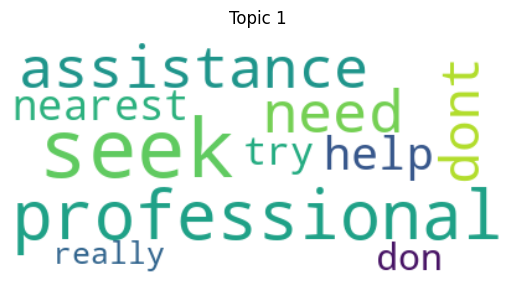

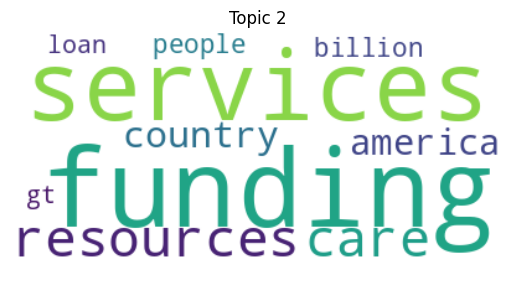

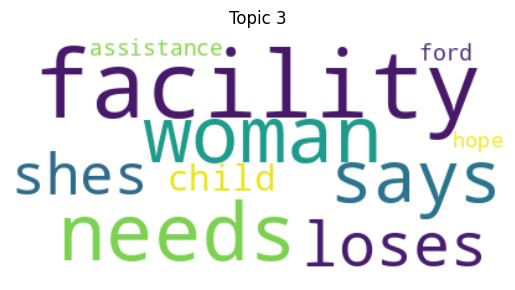

In [ ]:
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic"+" "+ str(topic))
    plt.show()

#visualize the top 3 topics
for i in range(1,4):
    create_wordcloud(topic_model, topic=i)

In [ ]:
topic_model.visualize_topics()

## Post covid

In [ ]:
#import dataset
data_post= pd.read_csv('postcovid.csv')
# Customizing the preprocessor to exclude removing hashtags since they are valuable as a rich information
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION,p.OPT.SMILEY,p.OPT.NUMBER )

#forming a separate feature for cleaned tweets
for i,v in enumerate(data_pre['Text']):
    data_post.loc[i,'text'] = p.clean(v)

data_post.head()

#REMOVE ONLY THE '#'NOT THE WORD AFTER
def remove_hashtag_sign(text):
    text = re.sub(r'#', '', text)
    return text

data_post['text'] = data_post['text'].apply(lambda x:remove_hashtag_sign(x))


data_post['text'] = data_post['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
data_post.head()

#prepare tweet list
tweet_list = data_post.text.tolist()

default_stop_words = set(CountVectorizer(stop_words='english').get_stop_words())
# Custom stop words
custom_stop_words = {'amp', 'https', 'http','mental', 'mentalhealth', "health"}

# Combine default and custom stop words
all_stop_words = default_stop_words.union(custom_stop_words)

# Use combined stop words in the vectorizer
vectorizer_model = CountVectorizer(stop_words=list(all_stop_words))

topic_model = BERTopic(vectorizer_model=vectorizer_model)

# Fit the model and get topics
topics, _ = topic_model.fit_transform(tweet_list)

In [ ]:
 topic_model.get_topic_info()

,Topic,Count,Name
0,-1,1299,-1_provider_services_support_care
1,0,251,0_trump_dangerous_donald_needs
2,1,186,1_apps_app_mhealth_anxiety
3,2,127,2_year_event_support_thank
4,3,118,3_nhs_children_services_child
...,...,...,...
65,64,11,64_mindfulness_momlife_education_kids
66,65,11,65_near_informedimmigrant_organizing_zip
67,66,11,66_men_politicians_women_adversely
68,67,11,67_nearest_facility_failings_cheating


In [ ]:
def get_bert_topics(topic_model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words=topic_model.get_topic(i)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)

get_bert_topics(topic_model, len(set(topics))-1)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 60,Topic # 61,Topic # 62,Topic # 63,Topic # 64,Topic # 65,Topic # 66,Topic # 67,Topic # 68,Topic # 69
0,trump,apps,year,nhs,seek,funding,facility,spn,facility,suicide,...,faith,joeharaszt1,telepsychiatry,joeharaszti,standardized,mindfulness,near,men,nearest,bother
1,dangerous,app,event,children,professional,services,needs,lori,dunsmuir,suicideprevention,...,religion,panic,telemedicine,pasadena,measures,momlife,informedimmigrant,politicians,facility,blatant
2,donald,mhealth,support,services,dont,resources,woman,support,lodge,prevention,...,god,pasadena,ai,panicdisorder,researchers,education,organizing,women,failings,pmdd
3,needs,anxiety,thank,child,need,care,says,provider,prepares,teen,...,church,panicdisorder,platform,la,evaluate,kids,zip,adversely,cheating,meds
4,man,smartphone,amazing,kids,assistance,billion,loses,school,site,downpatrick,...,churches,la,virtual,panic,lack,teach,enter,mras,russia,diagnosis
5,facility,improve,awareness,youth,help,people,shes,585,maps,selfcare,...,prayed,attack,digital,attack,apps,meditation,code,correctly,coworkers,went
6,case,mobile,improv,childrens,nearest,country,child,6486,new,depression,...,priest,gad,treat,psychiatrist,reporting,family,action,produces,overtaken,bipolar
7,president,track,charity,young,finding,gt,ford,mentalhealthto,old,youth,...,christians,psychiatrist,areas,phobic,engagement,happiness,visit,cuts,fantasies,told
8,psychiatrists,effective,excited,schools,feeling,loan,assistance,efficient,building,support,...,encouraged,anxiety,cdwsocial,stresstips,user,inspiration,site,wing,giant,consulting
9,professionals,free,join,brexit,like,budget,professional,connect,open,prosocialresearch,...,wisdom,annoyed,synergistically,phobia,review,app,today,frequently,ahiyas,ignorance


In [ ]:
topic_model.visualize_barchart()

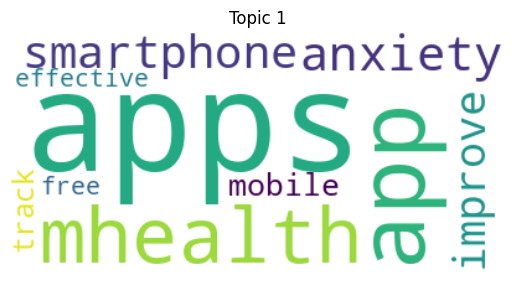

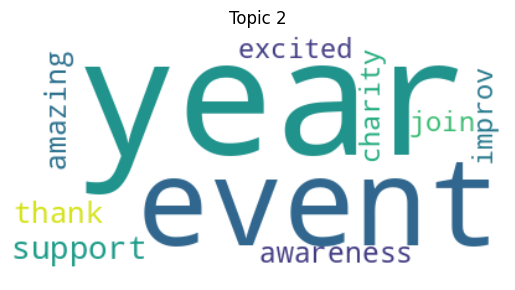

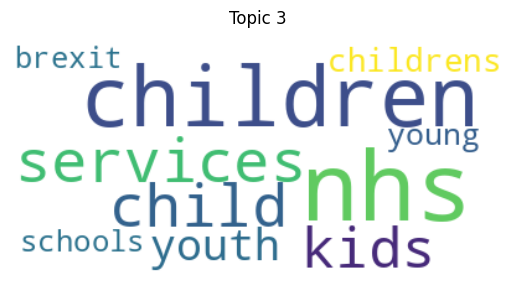

In [ ]:
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic"+" "+ str(topic))
    plt.show()

#visualize the top 3 topics
for i in range(1,4):
    create_wordcloud(topic_model, topic=i)

In [ ]:
topic_model.visualize_topics()

## Pre covid(positive)

In [ ]:
all = pd.read_csv("sa_pre.csv")
all_pos = all[all["sentiment"] == "positive"]
all_pos.to_csv("pos_sa_pre.csv")
all_neg = all[all["sentiment"] == "negative"]
all_neg.to_csv("neg_sa_re.csv")

In [ ]:
#import dataset
data_all= pd.read_csv('pos_sa_pre.csv')
# Customizing the preprocessor to exclude removing hashtags since they are valuable as a rich information
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION,p.OPT.SMILEY,p.OPT.NUMBER )

#forming a separate feature for cleaned tweets
for i,v in enumerate(data_pre['Text']):
    data_all.loc[i,'text'] = p.clean(v)

data_all.head()

#REMOVE ONLY THE '#'NOT THE WORD AFTER
def remove_hashtag_sign(text):
    text = re.sub(r'#', '', str(text))
    return text

data_all['text'] = data_all['text'].apply(lambda x:remove_hashtag_sign(x))


data_all['text'] = data_all['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
data_all.head()

#prepare tweet list
tweet_list = data_all.text.tolist()

default_stop_words = set(CountVectorizer(stop_words='english').get_stop_words())
# Custom stop words
custom_stop_words = {'amp', 'https', 'http','mental', 'mentalhealth', "health"}

# Combine default and custom stop words
all_stop_words = default_stop_words.union(custom_stop_words)

# Use combined stop words in the vectorizer
vectorizer_model = CountVectorizer(stop_words=list(all_stop_words))

topic_model = BERTopic(vectorizer_model=vectorizer_model)

# Fit the model and get topics
topics, _ = topic_model.fit_transform(tweet_list)

In [ ]:
 topic_model.get_topic_info()

,Topic,Count,Name
0,-1,1406,-1_provider_services_care_professionals
1,0,339,0_apps_app_depression_anxiety
2,1,117,1_needs_facility_man_hes
3,2,111,2_seek_professional_need_dont
4,3,92,3_facility_needs_woman_says
...,...,...,...
61,60,12,60_delusional_delusions_misinformation_isstd
62,61,12,61_church_religion_churches_ministry
63,62,11,62_narcissist_narcissistic_dsm5_label
64,63,11,63_joeharaszti_pasadena_panicdisorder_la


In [ ]:
def get_bert_topics(topic_model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words=topic_model.get_topic(i)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)

get_bert_topics(topic_model, len(set(topics))-1)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 56,Topic # 57,Topic # 58,Topic # 59,Topic # 60,Topic # 61,Topic # 62,Topic # 63,Topic # 64,Topic # 65
0,apps,needs,seek,facility,thank,support,facility,funding,veterans,students,...,welfare,figures,telemedicine,counter,joeharaszt1,delusional,church,narcissist,joeharaszti,chris
1,app,facility,professional,needs,event,school,louisville,resources,va,campus,...,covered,rollback,telepsychiatry,recipe,panic,delusions,religion,narcissistic,pasadena,kickoff
2,depression,man,need,woman,awareness,provider,old,billion,crisis,universities,...,rural,banning,ai,nutrient,pasadena,misinformation,churches,dsm5,panicdisorder,jamie
3,anxiety,hes,dont,says,support,assistance,expanding,services,800,fuelling,...,clients,policy,platform,obesity,panicdisorder,isstd,ministry,label,la,tworkowski
4,smartphone,guy,assistance,loses,year,efficient,lodge,country,assistance,warns,...,kids,public,virtual,pregnancy,la,isstdac19,christians,mouth,panic,sullivan
5,meditation,assistance,help,shes,amazing,wellness,dunsmuir,gt,273,student,...,term,discussion,digital,choose,attack,satanic,faith,typically,attack,page
6,mindfulness,know,nearest,child,join,supporting,prepares,loan,hotline,university,...,expenditure,apa,digitalhealth,fitfam,gad,isstd2019,community,malignant,psychiatrist,mentioned
7,media,committed,finding,ford,share,youth,site,budget,line,college,...,thirds,rule,treat,weightloss,psychiatrist,disseminating,god,narcissism,flying,fall
8,social,ill,really,assistance,leone,great,new,million,text,leading,...,hardest,psychiatrists,areas,food,anxiety,reflective,hispanic,opens,phobic,season
9,mhealth,jail,don,professional,sierra,early,maps,investment,8255,crisis,...,guardians,goldwater,linkedin,parenting,annoyed,destroy,commandment,diagnosis,phobia,night


In [ ]:
topic_model.visualize_barchart()

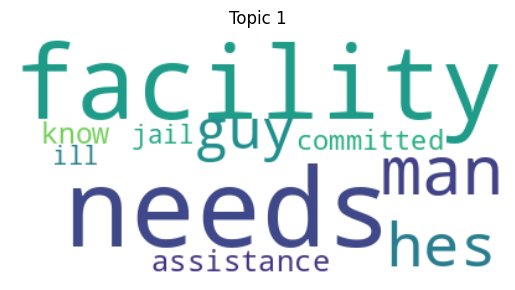

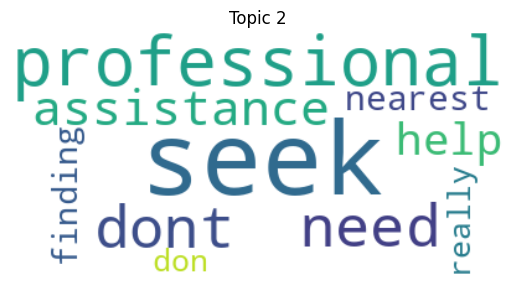

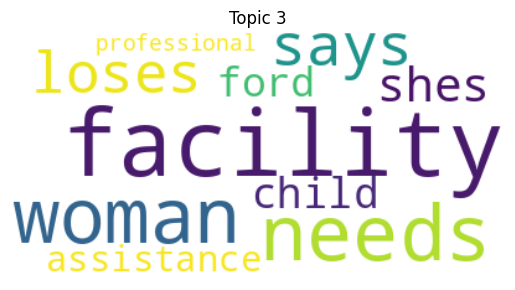

In [ ]:
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic"+" "+ str(topic))
    plt.show()

#visualize the top 3 topics
for i in range(1,4):
    create_wordcloud(topic_model, topic=i)

In [ ]:
topic_model.visualize_topics()

## pre covid (negative)

In [ ]:
#import dataset
data_all= pd.read_csv('neg_sa_re.csv')
# Customizing the preprocessor to exclude removing hashtags since they are valuable as a rich information
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION,p.OPT.SMILEY,p.OPT.NUMBER )

#forming a separate feature for cleaned tweets
for i,v in enumerate(data_pre['Text']):
    data_all.loc[i,'text'] = p.clean(v)

data_all.head()
#REMOVE ONLY THE '#'NOT THE WORD AFTER
def remove_hashtag_sign(text):
    text = re.sub(r'#', '', str(text))
    return text

data_all['text'] = data_all['text'].apply(lambda x:remove_hashtag_sign(x))


data_all['text'] = data_all['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
data_all.head()

#prepare tweet list
tweet_list = data_all.text.tolist()

default_stop_words = set(CountVectorizer(stop_words='english').get_stop_words())
# Custom stop words
custom_stop_words = {'amp', 'https', 'http','mental', 'mentalhealth', "health"}

# Combine default and custom stop words
all_stop_words = default_stop_words.union(custom_stop_words)

# Use combined stop words in the vectorizer
vectorizer_model = CountVectorizer(stop_words=list(all_stop_words))

topic_model = BERTopic(vectorizer_model=vectorizer_model)

# Fit the model and get topics
topics, _ = topic_model.fit_transform(tweet_list)

In [ ]:
topic_model.visualize_barchart()

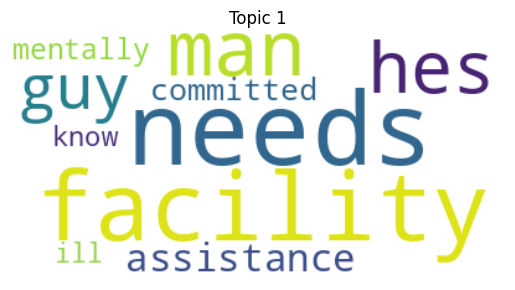

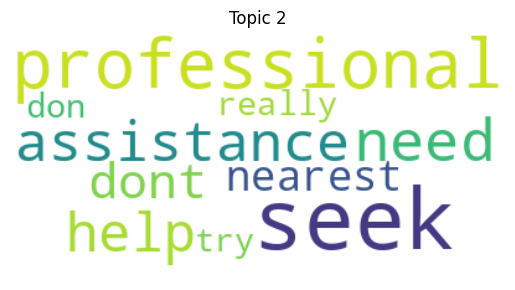

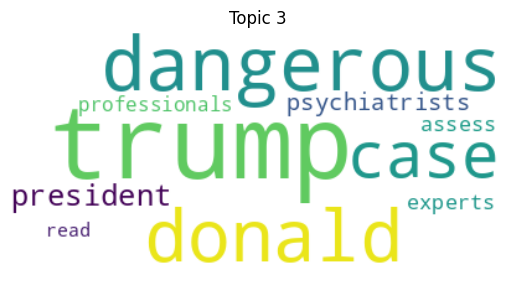

In [ ]:
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic"+" "+ str(topic))
    plt.show()

#visualize the top 3 topics
for i in range(1,4):
    create_wordcloud(topic_model, topic=i)

In [ ]:
topic_model.visualize_topics()

## Post covid (positive)

In [ ]:
all = pd.read_csv("sa_pos.csv")
all_pos = all[all["sentiment"] == "positive"]
all_pos.to_csv("pos_sa_pos.csv")
all_neg = all[all["sentiment"] == "negative"]
all_neg.to_csv("neg_sa_pos.csv")

In [ ]:
#import dataset
data_all= pd.read_csv('pos_sa_pos.csv')
# Customizing the preprocessor to exclude removing hashtags since they are valuable as a rich information
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION,p.OPT.SMILEY,p.OPT.NUMBER )

#forming a separate feature for cleaned tweets
for i,v in enumerate(data_pre['Text']):
    data_all.loc[i,'text'] = p.clean(v)

data_all.head()
#REMOVE ONLY THE '#'NOT THE WORD AFTER
def remove_hashtag_sign(text):
    text = re.sub(r'#', '', str(text))
    return text

data_all['text'] = data_all['text'].apply(lambda x:remove_hashtag_sign(x))


data_all['text'] = data_all['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
data_all.head()

#prepare tweet list
tweet_list = data_all.text.tolist()

default_stop_words = set(CountVectorizer(stop_words='english').get_stop_words())
# Custom stop words
custom_stop_words = {'amp', 'https', 'http','mental', 'mentalhealth', "health"}

# Combine default and custom stop words
all_stop_words = default_stop_words.union(custom_stop_words)

# Use combined stop words in the vectorizer
vectorizer_model = CountVectorizer(stop_words=list(all_stop_words))

topic_model = BERTopic(vectorizer_model=vectorizer_model)

# Fit the model and get topics
topics, _ = topic_model.fit_transform(tweet_list)

In [ ]:
topic_model.visualize_barchart()

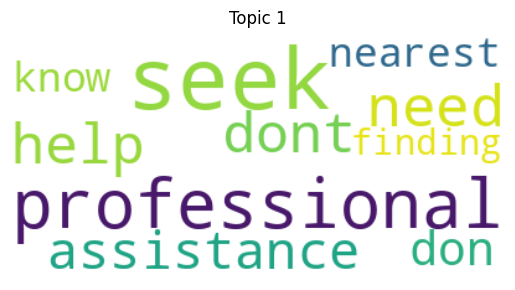

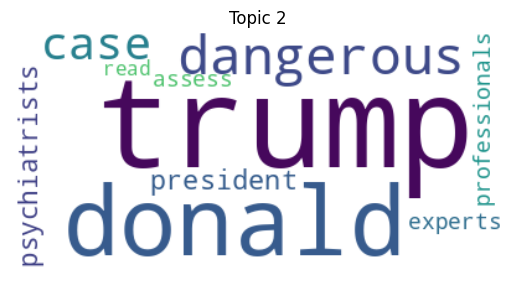

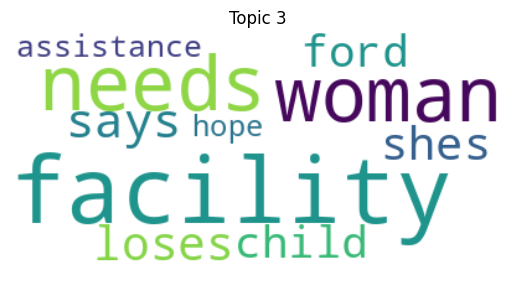

In [ ]:
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic"+" "+ str(topic))
    plt.show()

#visualize the top 3 topics
for i in range(1,4):
    create_wordcloud(topic_model, topic=i)

In [ ]:
topic_model.visualize_topics()

## Post covid (negative)

In [ ]:
#import dataset
data_all= pd.read_csv('neg_sa_pos.csv')
# Customizing the preprocessor to exclude removing hashtags since they are valuable as a rich information
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION,p.OPT.SMILEY,p.OPT.NUMBER )

#forming a separate feature for cleaned tweets
for i,v in enumerate(data_pre['Text']):
    data_all.loc[i,'text'] = p.clean(v)

data_all.head()
#REMOVE ONLY THE '#'NOT THE WORD AFTER
def remove_hashtag_sign(text):
    text = re.sub(r'#', '', str(text))
    return text

data_all['text'] = data_all['text'].apply(lambda x:remove_hashtag_sign(x))


data_all['text'] = data_all['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
data_all.head()

#prepare tweet list
tweet_list = data_all.text.tolist()

default_stop_words = set(CountVectorizer(stop_words='english').get_stop_words())
# Custom stop words
custom_stop_words = {'amp', 'https', 'http','mental', 'mentalhealth', "health"}

# Combine default and custom stop words
all_stop_words = default_stop_words.union(custom_stop_words)

# Use combined stop words in the vectorizer
vectorizer_model = CountVectorizer(stop_words=list(all_stop_words))

topic_model = BERTopic(vectorizer_model=vectorizer_model)

# Fit the model and get topics
topics, _ = topic_model.fit_transform(tweet_list)

In [ ]:
topic_model.visualize_barchart()

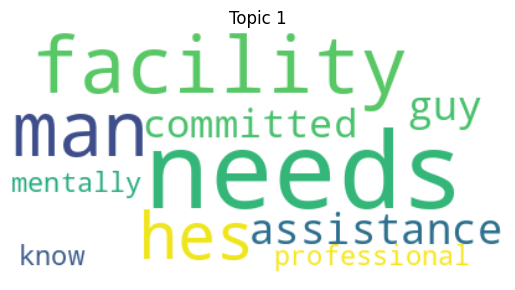

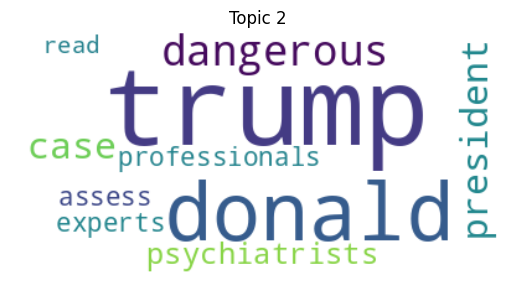

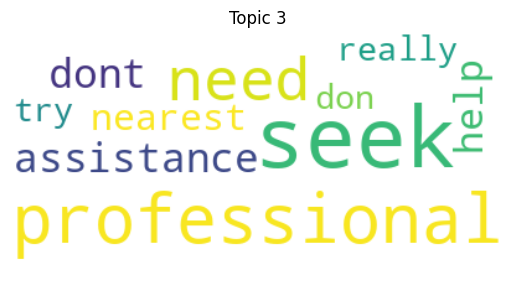

In [ ]:
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic"+" "+ str(topic))
    plt.show()

#visualize the top 3 topics
for i in range(1,4):
    create_wordcloud(topic_model, topic=i)

In [ ]:
topic_model.visualize_topics()